In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 学習データを読み込む
train = np.loadtxt('kaiki.csv', delimiter=',', dtype='int', skiprows=1)
train_x = train[:,0]
train_y = train[:,1]

In [3]:
# 標準化
mu = train_x.mean()   # 平均
sigma = train_x.std() # 標準偏差
def standardize(x):
    return (x - mu) / sigma

train_z = standardize(train_x)

In [4]:
# パラメータを初期化
theta = np.random.rand(3)

train_z

In [6]:
# 学習データの行列を作る
def to_matrix(x):
    return np.vstack([np.ones(x.size), x, x ** 2]).T

X = to_matrix(train_z)

# 予測関数
def f(x):
    return np.dot(x, theta)

In [7]:
np.ones(train_z.size)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [8]:
train_z

array([ 1.39433428,  1.11069026,  0.09554325, -1.59139223, -0.8449606 ,
        0.93154667, -1.38239138, -1.74067856,  0.46875906,  0.73747445,
       -0.11345761, -0.63595975, -0.36724436, -0.44188752,  0.3045441 ,
        1.94669369,  0.25975821,  0.25975821, -1.23310505,  0.84197488])

In [9]:
train_z ** 2

array([1.94416809, 1.23363286, 0.00912851, 2.53252924, 0.71395842,
       0.8677792 , 1.91100592, 3.02996185, 0.21973506, 0.54386856,
       0.01287263, 0.4044448 , 0.13486842, 0.19526458, 0.09274711,
       3.78961632, 0.06747433, 0.06747433, 1.52054807, 0.70892169])

In [10]:
np.vstack([np.ones(train_z.size), train_z, train_z ** 2])

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.39433428,  1.11069026,  0.09554325, -1.59139223, -0.8449606 ,
         0.93154667, -1.38239138, -1.74067856,  0.46875906,  0.73747445,
        -0.11345761, -0.63595975, -0.36724436, -0.44188752,  0.3045441 ,
         1.94669369,  0.25975821,  0.25975821, -1.23310505,  0.84197488],
       [ 1.94416809,  1.23363286,  0.00912851,  2.53252924,  0.71395842,
         0.8677792 ,  1.91100592,  3.02996185,  0.21973506,  0.54386856,
         0.01287263,  0.4044448 ,  0.13486842,  0.19526458,  0.09274711,
         3.78961632,  0.06747433,  0.06747433,  1.52054807,  0.70892169]])

In [16]:
np.vstack([np.ones(train_z.size), train_z, train_z ** 2]).T

array([[ 1.        ,  1.39433428,  1.94416809],
       [ 1.        ,  1.11069026,  1.23363286],
       [ 1.        ,  0.09554325,  0.00912851],
       [ 1.        , -1.59139223,  2.53252924],
       [ 1.        , -0.8449606 ,  0.71395842],
       [ 1.        ,  0.93154667,  0.8677792 ],
       [ 1.        , -1.38239138,  1.91100592],
       [ 1.        , -1.74067856,  3.02996185],
       [ 1.        ,  0.46875906,  0.21973506],
       [ 1.        ,  0.73747445,  0.54386856],
       [ 1.        , -0.11345761,  0.01287263],
       [ 1.        , -0.63595975,  0.4044448 ],
       [ 1.        , -0.36724436,  0.13486842],
       [ 1.        , -0.44188752,  0.19526458],
       [ 1.        ,  0.3045441 ,  0.09274711],
       [ 1.        ,  1.94669369,  3.78961632],
       [ 1.        ,  0.25975821,  0.06747433],
       [ 1.        ,  0.25975821,  0.06747433],
       [ 1.        , -1.23310505,  1.52054807],
       [ 1.        ,  0.84197488,  0.70892169]])

In [11]:
# 目的関数
def E(x, y):
    return 0.5 * np.sum((y - f(x)) ** 2)

In [12]:
# 学習率
ETA = 1e-3

# 誤差の差分
diff = 1

# 更新回数
count = 0

In [13]:
# 誤差の差分が0.01以下になるまでパラメータ更新を繰り返す
error = E(X, train_y)
while diff > 1e-2:
    # 更新結果を一時変数に保存
    theta = theta - ETA * np.dot(f(X) - train_y, X)

    # 前回の誤差との差分を計算
    current_error = E(X, train_y)
    diff = error - current_error
    error = current_error

    # ログの出力
    count += 1
    log = '{}回目: theta = {}, 差分 = {:.4f}'
    print(log.format(count, theta, diff))

1回目: theta = [9.48366088 2.4222067  9.70867045], 差分 = 152532.0189
2回目: theta = [17.68281426  4.25680561 18.0950365 ], 差分 = 137331.0961
3回目: theta = [25.55025724  6.06634597 25.95458312], 差分 = 123729.2289
4回目: theta = [33.10316043  7.85059813 33.31686248], 差分 = 111556.0765
5回目: theta = [40.35775998  9.60937807 40.20979547], 差分 = 100659.5046
6回目: theta = [47.32940887 11.34254417 46.65976154], 差分 = 90903.6375
7回目: theta = [54.03262546 13.04999422 52.69168358], 差分 = 82167.1184
8回目: theta = [60.48113928 14.73166264 58.32910811], 差分 = 74341.5564
9回目: theta = [66.68793433 16.38751783 63.59428107], 差分 = 67330.1391
10回目: theta = [72.66529002 18.01755966 68.50821948], 差分 = 61046.3944
11回目: theta = [78.42481983 19.62181719 73.09077907], 差分 = 55413.0843
12回目: theta = [83.97750785 21.2003464  77.36071827], 差分 = 50361.2170
13回目: theta = [89.33374333 22.75322822 81.33575861], 差分 = 45829.1652
14回目: theta = [94.50335329 24.2805665  85.03264188], 差分 = 41761.8786
15回目: theta = [99.49563339 25.78248627 88

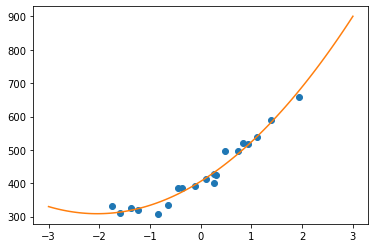

In [17]:
# プロットして確認
x = np.linspace(-3, 3, 100)
plt.plot(train_z, train_y, 'o')
plt.plot(x, f(to_matrix(x)))
plt.show()